In [1]:
#Import all the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
import cv2
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
tf.__version__

'2.7.0'

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
base = "/content/drive/MyDrive/AIML/CapStone"
os.chdir(base)

In [ ]:
!ls -l Annotations/

total 459
-r-------- 1 root root 233390 Dec  3  2020 'Test Annotation.csv'
-r-------- 1 root root 236408 Dec  3  2020 'Train Annotations.csv'


In [ ]:
!ls -l 'Car Images'/

total 8
dr-x------ 2 root root 4096 Jan 29  2021 'Test Images'
dr-x------ 2 root root 4096 Jan 29  2021 'Train Images'


In [ ]:
!ls -l 'Car Images'/'Test Images'

total 784
dr-x------ 2 root root 4096 Jan 29  2021 'Acura Integra Type R 2001'
dr-x------ 2 root root 4096 Jan 29  2021 'Acura RL Sedan 2012'
dr-x------ 2 root root 4096 Jan 29  2021 'Acura TL Sedan 2012'
dr-x------ 2 root root 4096 Jan 29  2021 'Acura TL Type-S 2008'
dr-x------ 2 root root 4096 Jan 29  2021 'Acura TSX Sedan 2012'
dr-x------ 2 root root 4096 Jan 29  2021 'Acura ZDX Hatchback 2012'
dr-x------ 2 root root 4096 Jan 29  2021 'AM General Hummer SUV 2000'
dr-x------ 2 root root 4096 Jan 29  2021 'Aston Martin V8 Vantage Convertible 2012'
dr-x------ 2 root root 4096 Jan 29  2021 'Aston Martin V8 Vantage Coupe 2012'
dr-x------ 2 root root 4096 Jan 29  2021 'Aston Martin Virage Convertible 2012'
dr-x------ 2 root root 4096 Jan 29  2021 'Aston Martin Virage Coupe 2012'
dr-x------ 2 root root 4096 Jan 29  2021 'Audi 100 Sedan 1994'
dr-x------ 2 root root 4096 Jan 29  2021 'Audi 100 Wagon 1994'
dr-x------ 2 root root 4096 Jan 29  2021 'Audi A5 Coupe 2012'
dr-x------ 2 root root 40

In [ ]:
!ls -l 'Car Images'/'Train Images'/'Jeep Compass SUV 2012'

total 22965
-r-------- 1 root root  553449 Oct  1  2019 00155.jpg
-r-------- 1 root root  185884 Oct  1  2019 00712.jpg
-r-------- 1 root root  410951 Oct  1  2019 00914.jpg
-r-------- 1 root root   64842 Oct  1  2019 01045.jpg
-r-------- 1 root root 6436737 Oct  1  2019 01427.jpg
-r-------- 1 root root  897398 Oct  1  2019 01657.jpg
-r-------- 1 root root  496175 Oct  1  2019 01718.jpg
-r-------- 1 root root   53269 Oct  1  2019 01764.jpg
-r-------- 1 root root  422181 Oct  1  2019 02151.jpg
-r-------- 1 root root   58087 Oct  1  2019 02161.jpg
-r-------- 1 root root   74076 Oct  1  2019 02219.jpg
-r-------- 1 root root   76387 Oct  1  2019 02366.jpg
-r-------- 1 root root  215562 Oct  1  2019 02514.jpg
-r-------- 1 root root 2031356 Oct  1  2019 02607.jpg
-r-------- 1 root root   42611 Oct  1  2019 02720.jpg
-r-------- 1 root root 2774342 Oct  1  2019 02996.jpg
-r-------- 1 root root  612237 Oct  1  2019 03179.jpg
-r-------- 1 root root  814963 Oct  1  2019 03255.jpg
-r-------- 1 roo

In [ ]:
df = pd.read_csv('Car names and make.csv', header=None,names =['names'])
df['year'] = df['names'].str[-4:]
df['names'] = df['names'].apply(lambda x:x[:-4])
df

,names,year
0,AM General Hummer SUV,2000
1,Acura RL Sedan,2012
2,Acura TL Sedan,2012
3,Acura TL Type-S,2008
4,Acura TSX Sedan,2012
...,...,...
191,Volkswagen Beetle Hatchback,2012
192,Volvo C30 Hatchback,2012
193,Volvo 240 Sedan,1993
194,Volvo XC90 SUV,2007


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   names   196 non-null    object
 1   year    196 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


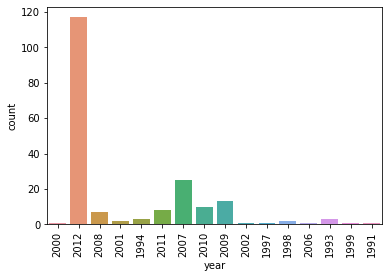

In [ ]:
sns.countplot(x='year',data=df)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
text = " ".join(name for name in df.names)
print ("There are {} words in the combination of all records.".format(len(text)))

There are 4669 words in the combination of all records.


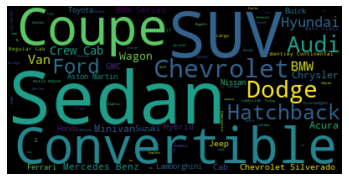

In [ ]:
from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(background_color="black").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

can observe dataset has more of Sedan , SUV and Coupe brand type cars

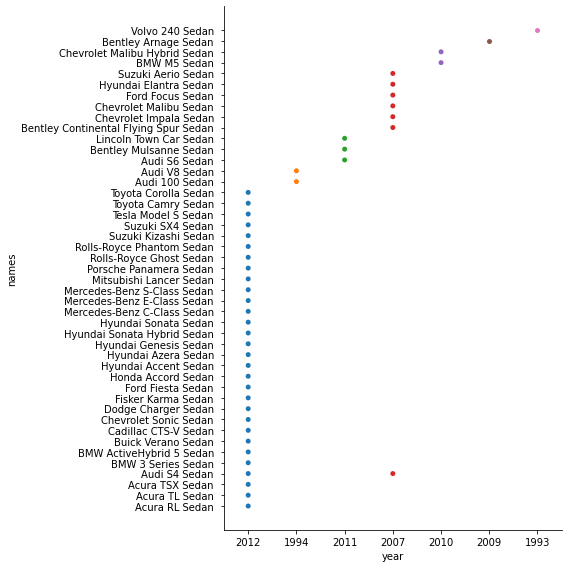

In [ ]:
# filtering the rows for Sedan
df1=df[df['names'].str.contains('Sedan')]
sns.catplot(y="names", x="year", data=df1,kind="swarm",height=8, aspect=1)

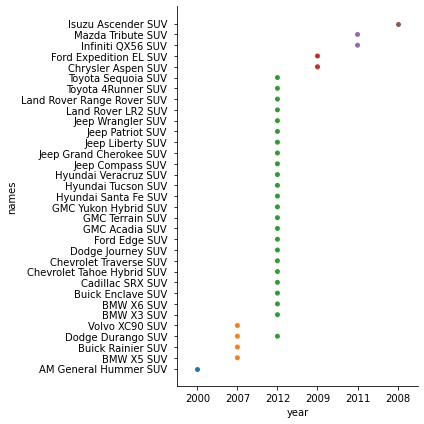

In [ ]:
# filtering the rows for Sedan
df2=df[df['names'].str.contains('SUV')]
sns.catplot(y="names", x="year", data=df2,kind="swarm",height=6, aspect=1)

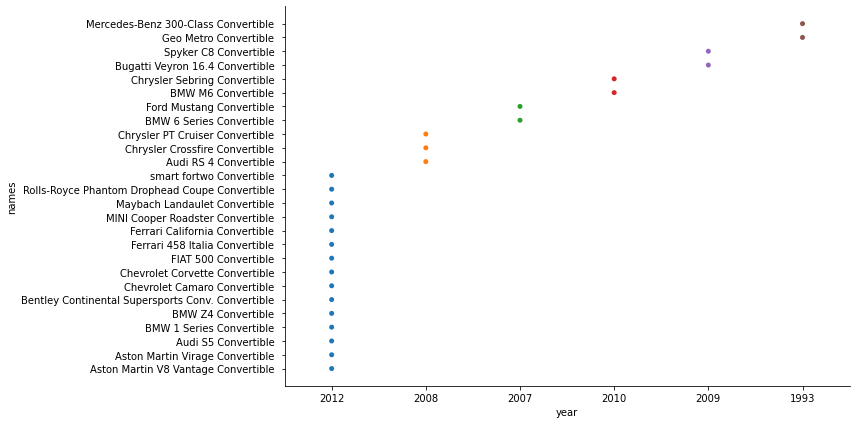

In [ ]:
# filtering the rows for Sedan
df3=df[df['names'].str.contains('Convertible')]
sns.catplot(y="names", x="year", data=df3,kind="swarm",height=6, aspect=2)

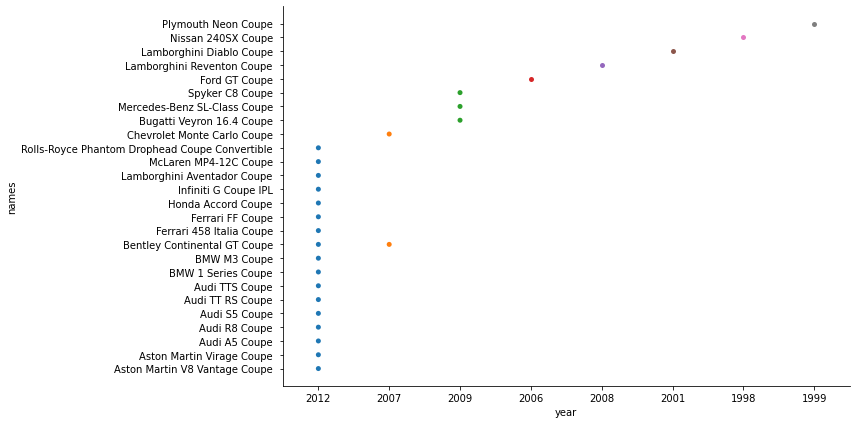

In [ ]:
# filtering the rows for Sedan
df4=df[df['names'].str.contains('Coupe')]
sns.catplot(y="names", x="year", data=df4,kind="swarm",height=6, aspect=2)

In [ ]:
def get_image_details(path):
    data = pd.DataFrame()
    base_path = os.path.join(base,path)

    # list all folders inside train directory
    for dname in os.listdir(base_path):   
      dir_path = os.path.join(base_path, dname)  
      # if it's a directory
      if os.path.isdir(dir_path):
        for fname in os.listdir(dir_path):
          # is it a valid file (ends with .jpg)
            if fname.endswith('.jpg'): 
              fpath = os.path.join(dir_path, fname)
            # read each image inside train directory one by one
              img = cv2.imread(fpath)
              temp_df = pd.DataFrame({'Height': [img.shape[0]],'Width' : [img.shape[1]],'Path' : [fpath],'Name' : [fname],'Label' : [dname] })
              data = data.append(temp_df, ignore_index=True)
    return data           

In [ ]:
import cv2
test_path = 'Car Images/Test Images'
test_df = get_image_details(test_path)

In [ ]:
train_path = 'Car Images/Train Images'
train_df = get_image_details(train_path)

In [ ]:
test_df.head()

,Height,Width,Path,Name,Label
0,458,800,/content/drive/MyDrive/AIML/CapStone/Car Image...,00130.jpg,Acura Integra Type R 2001
1,823,551,/content/drive/MyDrive/AIML/CapStone/Car Image...,01002.jpg,Acura Integra Type R 2001
2,600,900,/content/drive/MyDrive/AIML/CapStone/Car Image...,00128.jpg,Acura Integra Type R 2001
3,1200,1600,/content/drive/MyDrive/AIML/CapStone/Car Image...,01176.jpg,Acura Integra Type R 2001
4,380,545,/content/drive/MyDrive/AIML/CapStone/Car Image...,00565.jpg,Acura Integra Type R 2001


In [ ]:
test_df.sort_values(['Name'], ascending=True,inplace=True)
train_df.sort_values(['Name'], ascending=True,inplace=True)

In [ ]:
test_df.head()

,Height,Width,Path,Name,Label
7710,182,276,/content/drive/MyDrive/AIML/CapStone/Car Image...,00001.jpg,Suzuki Aerio Sedan 2007
4036,360,640,/content/drive/MyDrive/AIML/CapStone/Car Image...,00002.jpg,Ferrari 458 Italia Convertible 2012
5773,741,1024,/content/drive/MyDrive/AIML/CapStone/Car Image...,00003.jpg,Jeep Patriot SUV 2012
7342,480,640,/content/drive/MyDrive/AIML/CapStone/Car Image...,00004.jpg,Toyota Camry Sedan 2012
7419,373,600,/content/drive/MyDrive/AIML/CapStone/Car Image...,00005.jpg,Tesla Model S Sedan 2012


In [ ]:
train_df.head()

,Height,Width,Path,Name,Label
1228,400,600,/content/drive/MyDrive/AIML/CapStone/Car Image...,00001.jpg,Audi TTS Coupe 2012
62,675,900,/content/drive/MyDrive/AIML/CapStone/Car Image...,00002.jpg,Acura TL Sedan 2012
3626,480,640,/content/drive/MyDrive/AIML/CapStone/Car Image...,00003.jpg,Dodge Dakota Club Cab 2007
5596,1386,2100,/content/drive/MyDrive/AIML/CapStone/Car Image...,00004.jpg,Hyundai Sonata Hybrid Sedan 2012
4482,108,144,/content/drive/MyDrive/AIML/CapStone/Car Image...,00005.jpg,Ford F-450 Super Duty Crew Cab 2012


In [ ]:
annt = "Annotations"
path = os.path.join(base,annt)
train_annt = pd.read_csv(path + '/Train Annotations.csv')
test_annt = pd.read_csv(path + '/Test Annotation.csv')

train_annt.columns=['Name','xmin', 'ymin','xmax', 'ymax','Class']
test_annt.columns=['Name','xmin', 'ymin','xmax', 'ymax','Class']

In [ ]:
train_annt.head(5)

,Name,xmin,ymin,xmax,ymax,Class
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106


In [ ]:
test_annt.head(5)

,Name,xmin,ymin,xmax,ymax,Class
0,00001.jpg,30,52,246,147,181
1,00002.jpg,100,19,576,203,103
2,00003.jpg,51,105,968,659,145
3,00004.jpg,67,84,581,407,187
4,00005.jpg,140,151,593,339,185


In [ ]:
test = pd.merge(test_df, test_annt, on='Name')
train = pd.merge(train_df, train_annt, on='Name')

In [ ]:

print("shape of Test set is ",test.shape)
print("shape of Train set is ",train.shape)

shape of Test set is  (8041, 10)
shape of Train set is  (8144, 10)


In [ ]:
test.head(5)

,Height,Width,Path,Name,Label,xmin,ymin,xmax,ymax,Class
0,182,276,/content/drive/MyDrive/AIML/CapStone/Car Image...,00001.jpg,Suzuki Aerio Sedan 2007,30,52,246,147,181
1,360,640,/content/drive/MyDrive/AIML/CapStone/Car Image...,00002.jpg,Ferrari 458 Italia Convertible 2012,100,19,576,203,103
2,741,1024,/content/drive/MyDrive/AIML/CapStone/Car Image...,00003.jpg,Jeep Patriot SUV 2012,51,105,968,659,145
3,480,640,/content/drive/MyDrive/AIML/CapStone/Car Image...,00004.jpg,Toyota Camry Sedan 2012,67,84,581,407,187
4,373,600,/content/drive/MyDrive/AIML/CapStone/Car Image...,00005.jpg,Tesla Model S Sedan 2012,140,151,593,339,185


In [ ]:
train.head(5)

,Height,Width,Path,Name,Label,xmin,ymin,xmax,ymax,Class
0,400,600,/content/drive/MyDrive/AIML/CapStone/Car Image...,00001.jpg,Audi TTS Coupe 2012,39,116,569,375,14
1,675,900,/content/drive/MyDrive/AIML/CapStone/Car Image...,00002.jpg,Acura TL Sedan 2012,36,116,868,587,3
2,480,640,/content/drive/MyDrive/AIML/CapStone/Car Image...,00003.jpg,Dodge Dakota Club Cab 2007,85,109,601,381,91
3,1386,2100,/content/drive/MyDrive/AIML/CapStone/Car Image...,00004.jpg,Hyundai Sonata Hybrid Sedan 2012,621,393,1484,1096,134
4,108,144,/content/drive/MyDrive/AIML/CapStone/Car Image...,00005.jpg,Ford F-450 Super Duty Crew Cab 2012,14,36,133,99,106


In [ ]:
!pwd

/content/drive/My Drive/AIML/CapStone


In [ ]:
test.to_csv('./test_df_final.csv',index=False)
train.to_csv('./train_df_final.csv',index=False)

In [5]:
test = pd.read_csv('./test_df_final.csv')
train= pd.read_csv('./train_df_final.csv')

In [6]:
#Create a dictionary to hold label and corresponding class name
num_classes = train['Class'].unique()
label_class_dict = dict(zip(train['Class'], train['Label']))

In [7]:
num_classes

array([ 14,   3,  91, 134, 106, 123,  89,  96, 167,  58,  49, 186, 135,
        85, 193, 172,  73, 192,  57,  79,  36, 120, 170, 194, 184,  86,
       180, 154, 139,  66, 133, 104,  38,  97, 105, 142,  13, 191, 119,
        25, 177, 173,  42, 148,  15,  53,  44,  65,  90, 124, 114, 190,
       101, 187,   8,  17, 111, 122,   5,  29, 126,  94, 188,  59, 110,
        43,  18, 116, 145,  20, 165, 138, 175, 112,  51,  37,  71,  61,
        74, 162, 131,  88, 121, 137,  83, 147, 161, 109,  28, 144, 136,
       143, 171, 178,  56,  40,  60, 155, 140,  76,  47,  30, 149, 174,
       179,  24, 176,   1, 108,  41,  19, 163,  54,  50,  68, 125, 160,
        93, 183,  45, 189,  48,  77,   6,  16,  12, 128,  23,  11,  63,
        72, 195, 107,  10, 196,  99, 141,  84, 132,   7,  26, 102, 168,
       153,  21,  31, 103,  69,  55,  46, 185, 100, 130, 156, 151,  87,
       169, 127, 158,  75, 182,  62, 166, 181,  22,   9,  67, 113, 117,
       115,  39,  70,  32, 146,   4,  80, 152, 164,  64, 118,  9

In [8]:
label_class_dict

{1: 'AM General Hummer SUV 2000',
 2: 'Acura RL Sedan 2012',
 3: 'Acura TL Sedan 2012',
 4: 'Acura TL Type-S 2008',
 5: 'Acura TSX Sedan 2012',
 6: 'Acura Integra Type R 2001',
 7: 'Acura ZDX Hatchback 2012',
 8: 'Aston Martin V8 Vantage Convertible 2012',
 9: 'Aston Martin V8 Vantage Coupe 2012',
 10: 'Aston Martin Virage Convertible 2012',
 11: 'Aston Martin Virage Coupe 2012',
 12: 'Audi RS 4 Convertible 2008',
 13: 'Audi A5 Coupe 2012',
 14: 'Audi TTS Coupe 2012',
 15: 'Audi R8 Coupe 2012',
 16: 'Audi V8 Sedan 1994',
 17: 'Audi 100 Sedan 1994',
 18: 'Audi 100 Wagon 1994',
 19: 'Audi TT Hatchback 2011',
 20: 'Audi S6 Sedan 2011',
 21: 'Audi S5 Convertible 2012',
 22: 'Audi S5 Coupe 2012',
 23: 'Audi S4 Sedan 2012',
 24: 'Audi S4 Sedan 2007',
 25: 'Audi TT RS Coupe 2012',
 26: 'BMW ActiveHybrid 5 Sedan 2012',
 27: 'BMW 1 Series Convertible 2012',
 28: 'BMW 1 Series Coupe 2012',
 29: 'BMW 3 Series Sedan 2012',
 30: 'BMW 3 Series Wagon 2012',
 31: 'BMW 6 Series Convertible 2007',
 32: 

In [9]:
train['Path'][0]

'/content/drive/MyDrive/AIML/CapStone/Car Images/Train Images/Audi TTS Coupe 2012/00001.jpg'

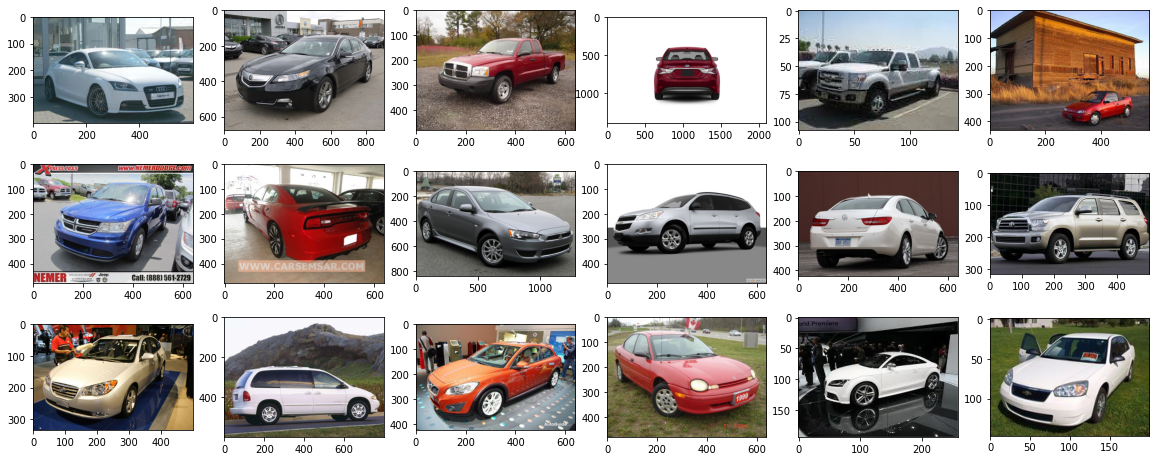

In [10]:
# example train images
plt.figure(figsize=(20,8)) 
for i in range(18):
    plt.subplot(3, 6, i + 1) 
    plt.imshow(plt.imread(train['Path'][i]))

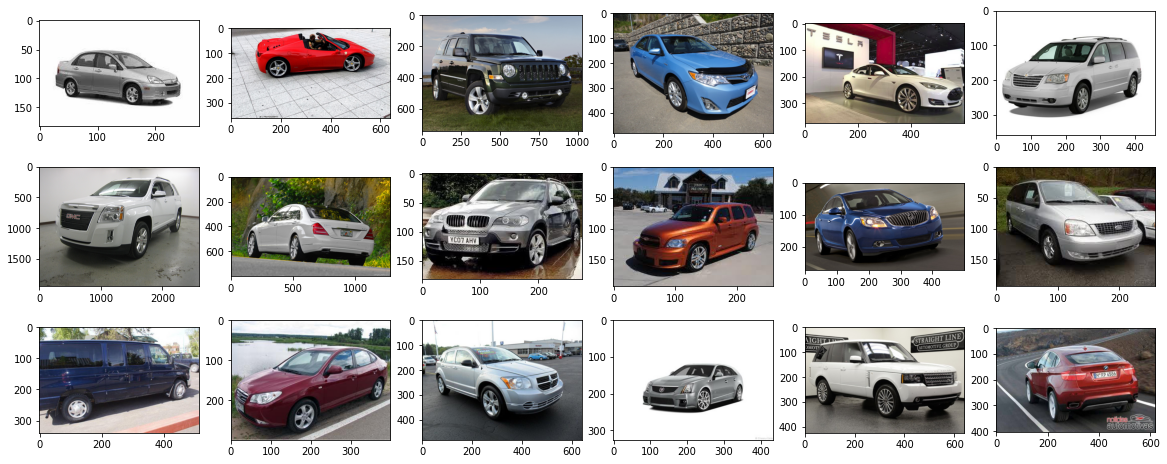

In [11]:
# example test images
plt.figure(figsize=(20,8)) 
for i in range(18):
    plt.subplot(3, 6, i + 1) 
    plt.imshow(plt.imread(test['Path'][i]))

In [12]:
#Read the image and draw a rectangle as per bounding box information
import cv2
def display_img_with_BB(idx):
    img = cv2.imread(train.loc[idx,'Path'])
    cv2.rectangle(img, 
                (train.loc[idx, 'xmin'],train.loc[idx, 'ymin']),
                (train.loc[idx, 'xmax'],train.loc[idx, 'ymax']), 
                (0,255,0),
                2)
    #Convert BGR format (used by opencv to RGB format used by matplotlib)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    #Draw image using matplotlib
    plt.suptitle(train.loc[img_num, 'Label'])
    plt.imshow(img)
    plt.show()

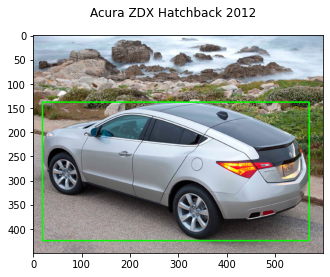

In [13]:
#Pickup a random image number
img_num = np.random.randint(0, train.shape[0])
display_img_with_BB(img_num)

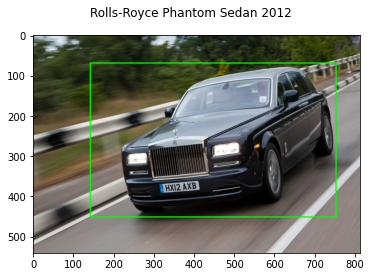

In [14]:
#Pickup a random image number
img_num = np.random.randint(0, train.shape[0])
display_img_with_BB(img_num)

In [15]:
train.head(5)

,Height,Width,Path,Name,Label,xmin,ymin,xmax,ymax,Class
0,400,600,/content/drive/MyDrive/AIML/CapStone/Car Image...,00001.jpg,Audi TTS Coupe 2012,39,116,569,375,14
1,675,900,/content/drive/MyDrive/AIML/CapStone/Car Image...,00002.jpg,Acura TL Sedan 2012,36,116,868,587,3
2,480,640,/content/drive/MyDrive/AIML/CapStone/Car Image...,00003.jpg,Dodge Dakota Club Cab 2007,85,109,601,381,91
3,1386,2100,/content/drive/MyDrive/AIML/CapStone/Car Image...,00004.jpg,Hyundai Sonata Hybrid Sedan 2012,621,393,1484,1096,134
4,108,144,/content/drive/MyDrive/AIML/CapStone/Car Image...,00005.jpg,Ford F-450 Super Duty Crew Cab 2012,14,36,133,99,106


In [16]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import BatchNormalization , GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [17]:
image_size = 224
def data_generator(df, batch_size=32):

    while True:

        image_nums = np.random.randint(0,df.shape[0], size=batch_size)
        batch_images = np.zeros(shape=(batch_size, image_size, image_size, 3))
        batch_labels = np.zeros(shape=(batch_size, len(num_classes)))
        batch_bboxes = np.zeros(shape=(batch_size, 4))
        for i in range(batch_size):
            #Read and resize image
            img = image.load_img(df.loc[image_nums[i], 'Path'], target_size=(image_size, image_size))
            img_array = image.img_to_array(img)

            #Update batch
            batch_images[i] = img_array

            #convert image classification label to one hot vector
            cls_label = df.loc[image_nums[i], 'Class']
            cls_label = to_categorical(cls_label - 1,num_classes=len(num_classes), dtype='float32')
            batch_labels[i] = cls_label

            #Read and resize bounding box co-ordinates
            image_width = df.loc[image_nums[i], 'Width']
            image_height = df.loc[image_nums[i], 'Height']
            
            xmin = df.loc[image_nums[i], 'xmin'] * image_size/image_width
            xmax = df.loc[image_nums[i], 'xmax'] * image_size/image_width
            ymin = df.loc[image_nums[i], 'ymin'] * image_size/image_height
            ymax = df.loc[image_nums[i], 'ymax'] * image_size/image_height
            batch_bboxes[i] = [xmin, ymin, xmax-xmin, ymax-ymin]

        #Normalize batch images
        for i in range(batch_size):
            batch_images[i] = batch_images[i]/255.0
        
        batch_bboxes = batch_bboxes/image_size

        #Return batch
        yield batch_images, [batch_labels, batch_bboxes]

**Build Model**

In [18]:
tf.keras.backend.clear_session()
model = ResNet50(include_top=False,input_shape=(image_size, image_size, 3),weights='imagenet')
for layer in model.layers:
    layer.trainable = False

model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [19]:
x = model.output

#Flatten the output to feed to Dense layer
x1 = GlobalAveragePooling2D()(x)
x2 = Dropout(0.5)(x1)
x3 = Dense(200, activation='relu')(x2)
x4 = BatchNormalization()(x3)

#Classification
class_output = Dense(len(num_classes), activation='softmax',name='class')(x4)
#Regression
reg_output = Dense(4,activation='sigmoid',name='reg')(x4)

#with classification and regression
model = Model(inputs=model.input, outputs=[class_output,reg_output])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

Evaluation Metric **IOU**

In [20]:
def calculate_iou(y_true, y_pred):
    results = []
    
    for i in range(0,y_true.shape[0]):
    
        # set the types so we are sure what type we are using
        y_true = np.array(y_true, dtype=np.float32)
        y_pred = np.array(y_pred, dtype=np.float32)
        x_boxTrue_tleft = y_true[i,0]  # numpy index selection
        y_boxTrue_tleft = y_true[i,1]
        boxTrue_width = y_true[i,2]
        boxTrue_height = y_true[i,3]
        area_boxTrue = (boxTrue_width * boxTrue_height)

        # boxPred
        x_boxPred_tleft = y_pred[i,0]
        y_boxPred_tleft = y_pred[i,1]
        boxPred_width = y_pred[i,2]
        boxPred_height = y_pred[i,3]
        area_boxPred = (boxPred_width * boxPred_height)

        # calculate the bottom right coordinates for boxTrue and boxPred

        # boxTrue
        x_boxTrue_br = x_boxTrue_tleft + boxTrue_width
        y_boxTrue_br = y_boxTrue_tleft + boxTrue_height # Version 2 revision

        # boxPred
        x_boxPred_br = x_boxPred_tleft + boxPred_width
        y_boxPred_br = y_boxPred_tleft + boxPred_height # Version 2 revision


        # calculate the top left and bottom right coordinates for the intersection box, boxInt

        # boxInt - top left coords
        x_boxInt_tleft = np.max([x_boxTrue_tleft,x_boxPred_tleft])
        y_boxInt_tleft = np.max([y_boxTrue_tleft,y_boxPred_tleft]) # Version 2 revision

        # boxInt - bottom right coords
        x_boxInt_br = np.min([x_boxTrue_br,x_boxPred_br])
        y_boxInt_br = np.min([y_boxTrue_br,y_boxPred_br]) 

        # Calculate the area of boxInt, i.e. the area of the intersection 
        # between boxTrue and boxPred.
        # The np.max() function forces the intersection area to 0 if the boxes don't overlap.

        area_of_intersection = \
        np.max([0,(x_boxInt_br - x_boxInt_tleft)]) * np.max([0,(y_boxInt_br - y_boxInt_tleft)])

        iou = area_of_intersection / ((area_boxTrue + area_boxPred) - area_of_intersection)


        # This must match the type used in py_func
        iou = np.array(iou, dtype=np.float32)
        
        # append the result to a list at the end of each loop
        results.append(iou)
    
    # return the mean IoU score for the batch
    return np.mean(results)

def IoU(y_true, y_pred):
    iou = tf.py_function(calculate_iou, [y_true, y_pred], tf.float32)
    return iou

In [21]:
# Compile the model
model.compile(optimizer = 'adam', loss={'reg':'mse', 'class':'categorical_crossentropy'},
                               loss_weights={'reg':1, 'class':1},
                               metrics={'reg':[IoU], 'class':['accuracy']})

In [22]:
#Create train and test generator
batchsize = 224
train_generator = data_generator(train, batch_size=batchsize)
test_generator = data_generator(test, batch_size=batchsize)

earlystop = EarlyStopping(patience=5)
modelsave = ModelCheckpoint( monitor='val_class_accuracy',filepath='./model_resnet.h5', save_best_only=True, verbose=1)



In [23]:
history = model.fit(train_generator,
                epochs=5,
                steps_per_epoch= train.shape[0]//batchsize,
                validation_data=test_generator,
                validation_steps = test.shape[0]//batchsize,
                callbacks=[earlystop,modelsave])

Epoch 1/5
36/36 [==============================] - ETA: 0s - loss: 5.7279 - class_loss: 5.6010 - reg_loss: 0.1270 - class_accuracy: 0.0058 - reg_IoU: 0.1890 
Epoch 00001: val_class_accuracy improved from -inf to 0.00523, saving model to ./model_resnet.h5
36/36 [==============================] - 2603s 74s/step - loss: 5.7279 - class_loss: 5.6010 - reg_loss: 0.1270 - class_accuracy: 0.0058 - reg_IoU: 0.1890 - val_loss: 5.4432 - val_class_loss: 5.3927 - val_reg_loss: 0.0505 - val_class_accuracy: 0.0052 - val_reg_IoU: 0.3780
Epoch 2/5
36/36 [==============================] - ETA: 0s - loss: 5.5180 - class_loss: 5.4450 - reg_loss: 0.0730 - class_accuracy: 0.0051 - reg_IoU: 0.3229 
Epoch 00002: val_class_accuracy improved from 0.00523 to 0.00702, saving model to ./model_resnet.h5
36/36 [==============================] - 1066s 30s/step - loss: 5.5180 - class_loss: 5.4450 - reg_loss: 0.0730 - class_accuracy: 0.0051 - reg_IoU: 0.3229 - val_loss: 5.3972 - val_class_loss: 5.3683 - val_reg_loss: 0

In [ ]:
5.2954/0.0166

319.0

In [24]:
# Compile the model
model.compile(optimizer = 'adam', loss={'reg':'mse', 'class':'categorical_crossentropy'},
                               loss_weights={'reg':30, 'class':1},
                               metrics={'reg':[IoU], 'class':['accuracy']})

In [25]:
history=model.fit(train_generator,
                epochs=50,
                initial_epoch =5,
                steps_per_epoch= train.shape[0]//batchsize,
                validation_data=test_generator,
                validation_steps = test.shape[0]//batchsize,
                callbacks=[earlystop,modelsave])

Epoch 6/50
36/36 [==============================] - ETA: 0s - loss: 5.6959 - class_loss: 5.2799 - reg_loss: 0.0139 - class_accuracy: 0.0097 - reg_IoU: 0.6926
Epoch 00006: val_class_accuracy did not improve from 0.01161
36/36 [==============================] - 187s 5s/step - loss: 5.6959 - class_loss: 5.2799 - reg_loss: 0.0139 - class_accuracy: 0.0097 - reg_IoU: 0.6926 - val_loss: 5.7134 - val_class_loss: 5.2999 - val_reg_loss: 0.0138 - val_class_accuracy: 0.0097 - val_reg_IoU: 0.6969
Epoch 7/50
36/36 [==============================] - ETA: 0s - loss: 5.6224 - class_loss: 5.2514 - reg_loss: 0.0124 - class_accuracy: 0.0113 - reg_IoU: 0.7118
Epoch 00007: val_class_accuracy did not improve from 0.01161
36/36 [==============================] - 168s 5s/step - loss: 5.6224 - class_loss: 5.2514 - reg_loss: 0.0124 - class_accuracy: 0.0113 - reg_IoU: 0.7118 - val_loss: 5.5889 - val_class_loss: 5.2727 - val_reg_loss: 0.0105 - val_class_accuracy: 0.0071 - val_reg_IoU: 0.7197
Epoch 8/50
36/36 [====

In [26]:
history=model.fit(train_generator,
                epochs=70,
                initial_epoch =38,
                steps_per_epoch= train.shape[0]//batchsize,
                validation_data=test_generator,
                validation_steps = test.shape[0]//batchsize,
                callbacks=[earlystop,modelsave])

Epoch 39/70
36/36 [==============================] - ETA: 0s - loss: 5.1951 - class_loss: 4.8864 - reg_loss: 0.0103 - class_accuracy: 0.0443 - reg_IoU: 0.7371
Epoch 00039: val_class_accuracy did not improve from 0.03329
36/36 [==============================] - 157s 4s/step - loss: 5.1951 - class_loss: 4.8864 - reg_loss: 0.0103 - class_accuracy: 0.0443 - reg_IoU: 0.7371 - val_loss: 5.2854 - val_class_loss: 5.0137 - val_reg_loss: 0.0091 - val_class_accuracy: 0.0315 - val_reg_IoU: 0.7602
Epoch 40/70
36/36 [==============================] - ETA: 0s - loss: 5.1595 - class_loss: 4.8528 - reg_loss: 0.0102 - class_accuracy: 0.0439 - reg_IoU: 0.7405
Epoch 00040: val_class_accuracy did not improve from 0.03329
36/36 [==============================] - 158s 4s/step - loss: 5.1595 - class_loss: 4.8528 - reg_loss: 0.0102 - class_accuracy: 0.0439 - reg_IoU: 0.7405 - val_loss: 5.2700 - val_class_loss: 5.0042 - val_reg_loss: 0.0089 - val_class_accuracy: 0.0293 - val_reg_IoU: 0.7575
Epoch 41/70
36/36 [=

In [27]:
from keras.models import load_model

model_R = load_model('./model_resnet.h5', custom_objects={"IoU": IoU })

In [30]:
def predict_image(model,image_num, df):

    #Load image
    img = image.load_img(df.loc[image_num, 'Path'])
    w, h = img.size

    #Prepare input 

    img_resized = img.resize((image_size, image_size))
    input_array = image.img_to_array(img_resized)
    input_array = np.expand_dims(input_array, axis=0)

    input_array = input_array/255.0

    #Prediction
    pred = model.predict(input_array)
    
    label_pred, bbox_pred = pred[0][0], pred[1][0]  
    pred_class = label_class_dict[np.argmax(label_pred)]

    True_class = df.loc[image_num, 'Label']
    xmin, ymin, xmax, ymax = df.loc[image_num, ['xmin', 'ymin', 'xmax', 'ymax']]

    print('Real Label :', True_class, '\nPredicted Label: ', pred_class)
    
    #Draw bounding boxes - Actual (Red) and Predicted(Green)
    img = cv2.imread(df.loc[image_num, 'Path'])
    
    #Draw actual bounding box
    img = cv2.rectangle(img, (xmin, ymin), 
                        (xmax, ymax), (0,0,255), 3)
    
    #Draw predicted bounding box
    img = cv2.rectangle(img, (int(bbox_pred[0]*w), int(bbox_pred[1]*h)), 
                        (int((bbox_pred[0]+bbox_pred[2])*w), int((bbox_pred[1]+bbox_pred[3])*h)), (0,255,0), 3)

    #Display the picture
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

Real Label : Mercedes-Benz C-Class Sedan 2012 
Predicted Label:  Audi V8 Sedan 1994


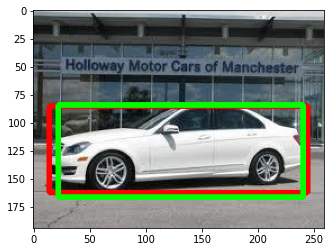

In [32]:
#Predict on Test Dataset
image_num = np.random.randint(0, test.shape[0])
predict_image(model_R,image_num, test)